In [4]:
import cabinetry
cabinetry.set_logging()

import pyhf


In [5]:
!cp /data/pubfs/xiaoj/zajj/nb/config_histograms.yml .

In [6]:
config = cabinetry.configuration.load("config_histograms.yml")# create template histograms
# collects all provided histograms (storing them in the format used internally by cabinetry for further processing)
cabinetry.templates.collect(config, method="uproot")
# build a workspace
ws = cabinetry.workspace.build(config)

INFO - cabinetry.configuration - opening config file config_histograms.yml
DEBUG - cabinetry.route -   in region Signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Data.npz
DEBUG - cabinetry.route -     reading sample Signal
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal.npz
DEBUG - cabinetry.route -       variation JEC Up
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JEC_Up.npz
DEBUG - cabinetry.route -       variation JEC Down
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JEC_Down.npz
DEBUG - cabinetry.route -       variation JER Up
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JER_Up.npz
DEBUG - cabinetry.route -       variation JER Down
DEBUG - cabinetry.histo - saving histogr

WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding OverallSys Luminosity to sample ZGammaQCD in region Signal_region
DEBUG - cabinetry.workspace - adding OverallSys and HistoSys JEC to sample ZGammaQCD in region Signal_region
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_JEC_Up_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_JEC_Down_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding OverallSys and HistoSys JER to sample ZGammaQCD in region Signal_region
WARNING - cabinetry.histo - the modif

WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_FakePhoton_FakeSyst_Down_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_Others_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding OverallSys Luminosity to sample Others in region Control_region
DEBUG - cabinetry.workspace - adding OverallSys and HistoSys JEC to sample Others in region Control_region
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_Others_JEC_Up_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_Others_modified.npz does not exist
WARNING - cabinetry.histo - loading

In [7]:
# run a fit
model, data = cabinetry.model_utils.model_and_data(ws)
fit_results = cabinetry.fit.fit(model, data)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier staterror_Signal_region (9 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Signal_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Luminosity (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SignalPDF (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SignalScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JEC (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JER (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier FakeSyst (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_Control_region (5 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - MINUIT status:
┌─────────────────────────────────────────────────────────────────────────┐
│                           

DEBUG - cabinetry.model_utils - total stdev is [[107, 73.3, 56.8, 32.3, 28.2], ... 5.14, 2.75, 30.6, 16.4, 5.29, 2.2, 8.01, 14]]
DEBUG - cabinetry.model_utils - total stdev per channel is [281, 99.1]
DEBUG - cabinetry.visualize.utils - saving figure as figures/Control_region_prefit.pdf
DEBUG - cabinetry.visualize.utils - saving figure as figures/Signal_region_prefit.pdf


[{'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Control_region'},
 {'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Signal_region'}]

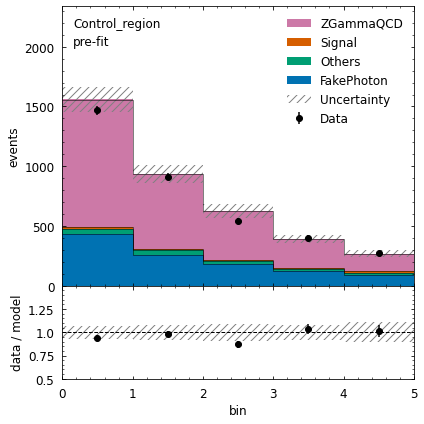

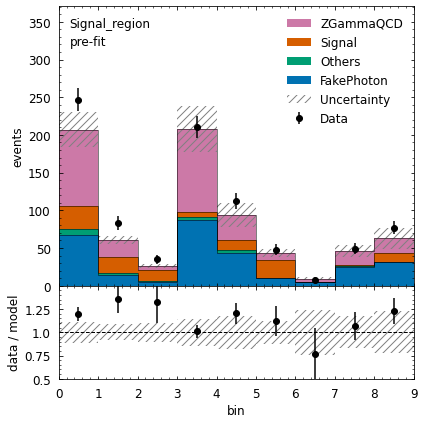

In [8]:
# visualize the pre-fit model prediction and data
model_pred = cabinetry.model_utils.prediction(model)
cabinetry.visualize.data_mc(model_pred, data, config=config)

DEBUG - cabinetry.model_utils - total stdev is [[34.9, 22.8, 17.2, 14.3, 10.4], ... 5.38, 3.54, 9.72, 6.43, 5.12, 1.5, 3.98, 5.39]]
DEBUG - cabinetry.model_utils - total stdev per channel is [63.3, 26.8]
DEBUG - cabinetry.visualize.utils - saving figure as figures/Control_region_postfit.pdf
DEBUG - cabinetry.visualize.utils - saving figure as figures/Signal_region_postfit.pdf


[{'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Control_region'},
 {'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Signal_region'}]

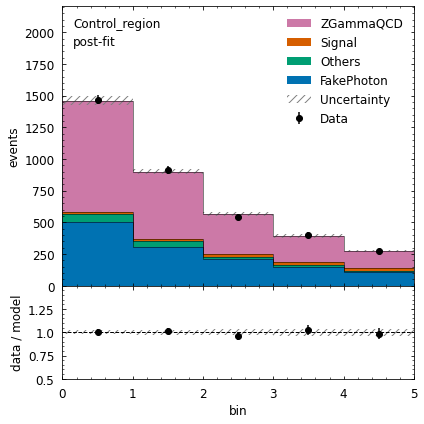

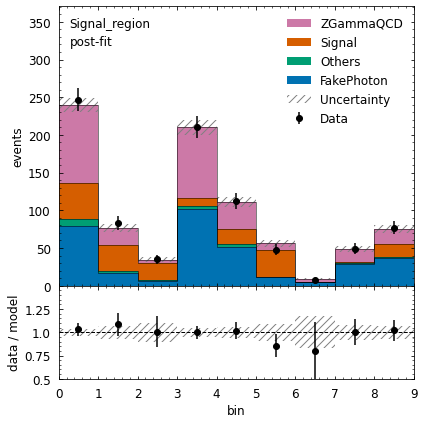

In [9]:
# visualize the post-fit model prediction and data
model_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
cabinetry.visualize.data_mc(model_postfit, data, config=config)

DEBUG - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


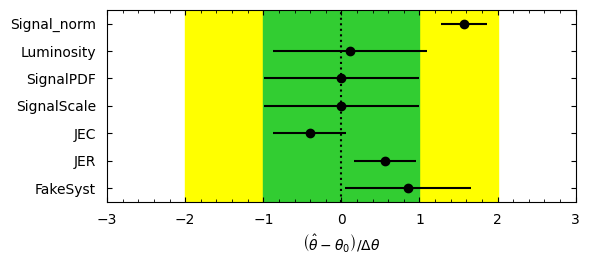

In [11]:
# cabinetry.visualize.pulls(fit_results, exclude=["Signal_norm"])
cabinetry.visualize.pulls(fit_results)


In [19]:
significance_results = cabinetry.fit.significance(model, data)

INFO - cabinetry.fit - calculating discovery significance
INFO - cabinetry.fit - observed p-value: 4.961e-15
INFO - cabinetry.fit - observed significance: 7.740
INFO - cabinetry.fit - expected p-value: 1.447e-09
INFO - cabinetry.fit - expected significance: 5.938
